In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data = pd.read_csv('/home/veinmahzy/Desktop/Sales Prediction/Dataset/train.csv')
data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2694,FDS26,20.35,Low Fat,0.089608,Dairy,262.1594,OUT049,1999,Medium,Tier 1,Supermarket Type1,3139.9128
5974,DRG01,NaN,Low Fat,0.078576,Soft Drinks,78.4670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
5408,NCH54,13.50,Low Fat,0.072965,Household,160.6920,OUT018,2009,Medium,Tier 3,Supermarket Type2,1917.5040
5382,FDQ59,NaN,Regular,0.000000,Breads,84.5908,OUT027,1985,Medium,Tier 3,Supermarket Type3,3020.0688
3291,FDR19,13.50,Regular,0.160624,Fruits and Vegetables,147.0102,OUT017,2007,NaN,Tier 2,Supermarket Type1,2770.3938
1722,FDC45,17.00,Low Fat,0.136286,Fruits and Vegetables,170.9106,OUT018,2009,Medium,Tier 3,Supermarket Type2,1197.7742
4745,FDI07,12.35,Regular,0.033754,Meat,199.0426,OUT035,2004,Small,Tier 2,Supermarket Type1,3361.6242
2013,FDQ55,13.65,Regular,0.013091,Fruits and Vegetables,114.8834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1612.5676
3971,FDM51,11.80,Regular,0.000000,Meat,102.4674,OUT010,1998,NaN,Tier 3,Grocery Store,203.7348
5252,FDV45,NaN,low fat,0.078872,Snack Foods,189.5556,OUT019,1985,Small,Tier 1,Grocery Store,1126.5336


In [3]:
# check data shape
data.shape


(8522, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                7059 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                6112 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


DATA PREPOCESSING

In [5]:
# checking duplicated data
data.duplicated().sum()

np.int64(0)

In [6]:
# checking missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

1. Missing  Values Imputation using median in 'Item weight' column, and using mode in 'Outlete_size' column

In [7]:
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace = True)

/tmp/ipykernel_29606/3162309161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace = True)


In [8]:
# imputation for categorical columns
print(data['Outlet_Size'].unique())
print(data['Outlet_Size'].mode())
print(data['Outlet_Type'].unique())

['Medium' nan 'High' 'Small']
0    Medium
Name: Outlet_Size, dtype: object
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [9]:
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = lambda x : x.mode()[0])
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [10]:
# imputatition
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [11]:
# checking missing values after imputation
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,12.813186,0.066135,141.000471,1997.831964,2181.455027
std,4.227434,0.051600,62.274675,8.372247,1706.530835
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026988,93.844250,1987.000000,834.913200
50%,12.600000,0.053935,143.014100,1999.000000,1794.331000
75%,16.000000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


EXPORATORY DATA ANALYSIS (EDA)

/tmp/ipykernel_29606/427178358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


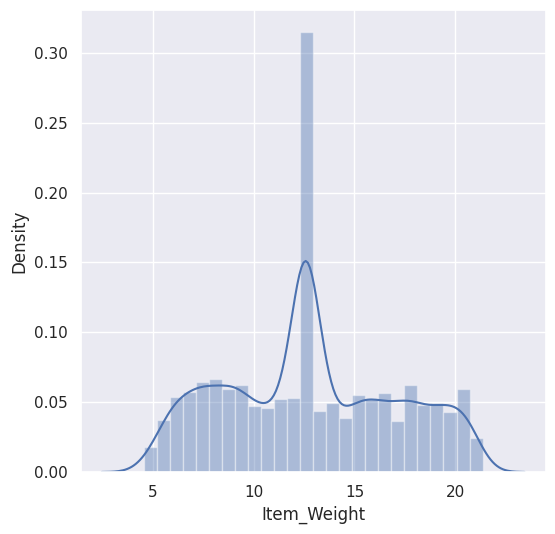

In [13]:
# Item_Weight Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

/tmp/ipykernel_29606/1532296033.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


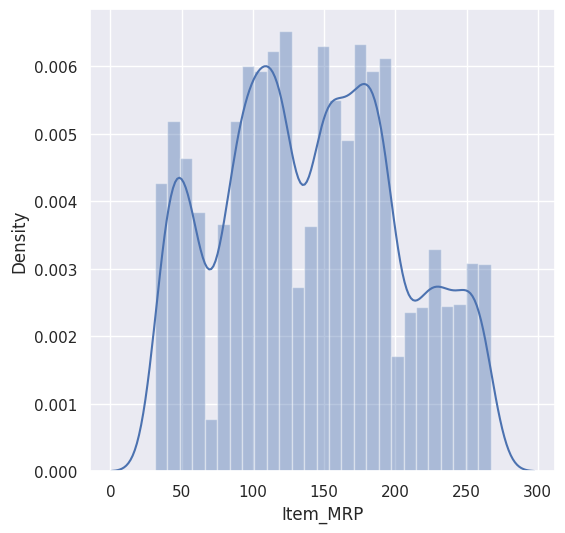

In [14]:
# Item_MRP Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

/tmp/ipykernel_29606/759898312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


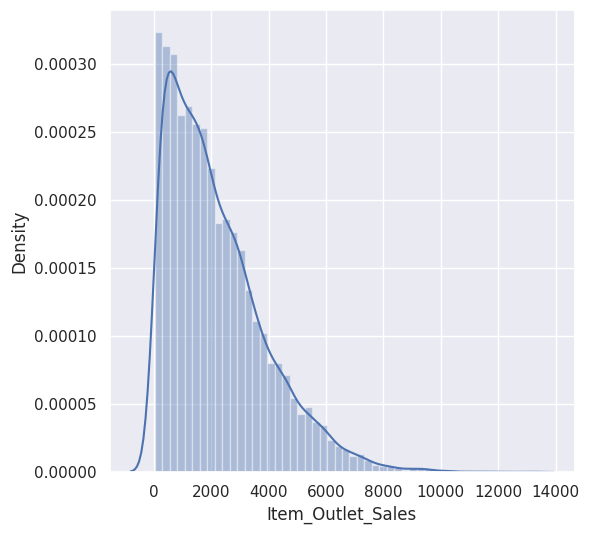

In [15]:
# Item_Outlet_Sales Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

In [16]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

/tmp/ipykernel_29606/1479567841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=data, ax=ax, palette=color_palette)
/tmp/ipykernel_29606/1479567841.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Fat Content', loc='upper right', bbox_to_anchor=(1.25, 1))


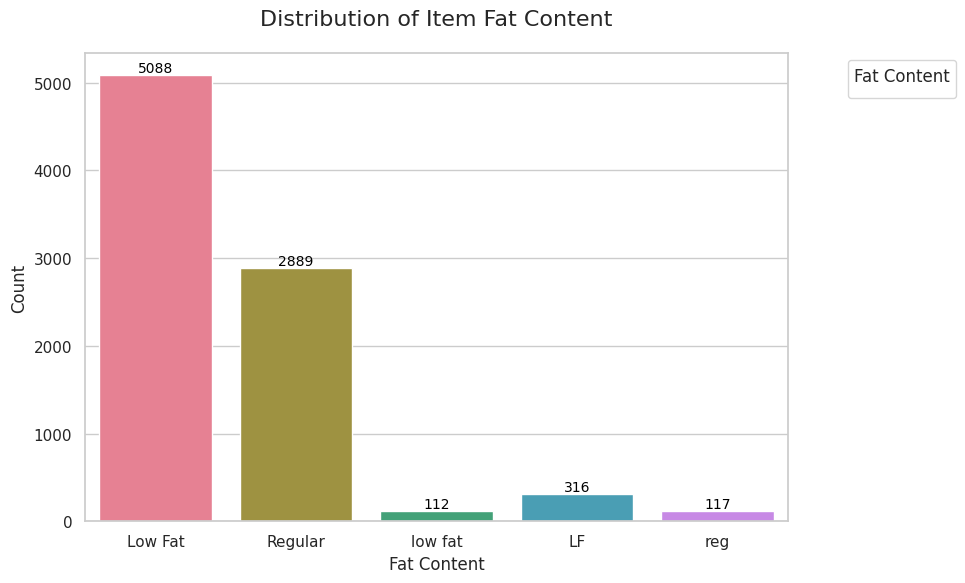

In [17]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("husl", n_colors=len(data['Item_Fat_Content'].unique()))
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='Item_Fat_Content', data=data, ax=ax, palette=color_palette)

# Customize the plot
ax.set_title('Distribution of Item Fat Content', fontsize=16, pad=20)
ax.set_xlabel('Fat Content', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels 
plt.xticks(rotation=0)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.legend(title='Fat Content', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

/tmp/ipykernel_29606/133926297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


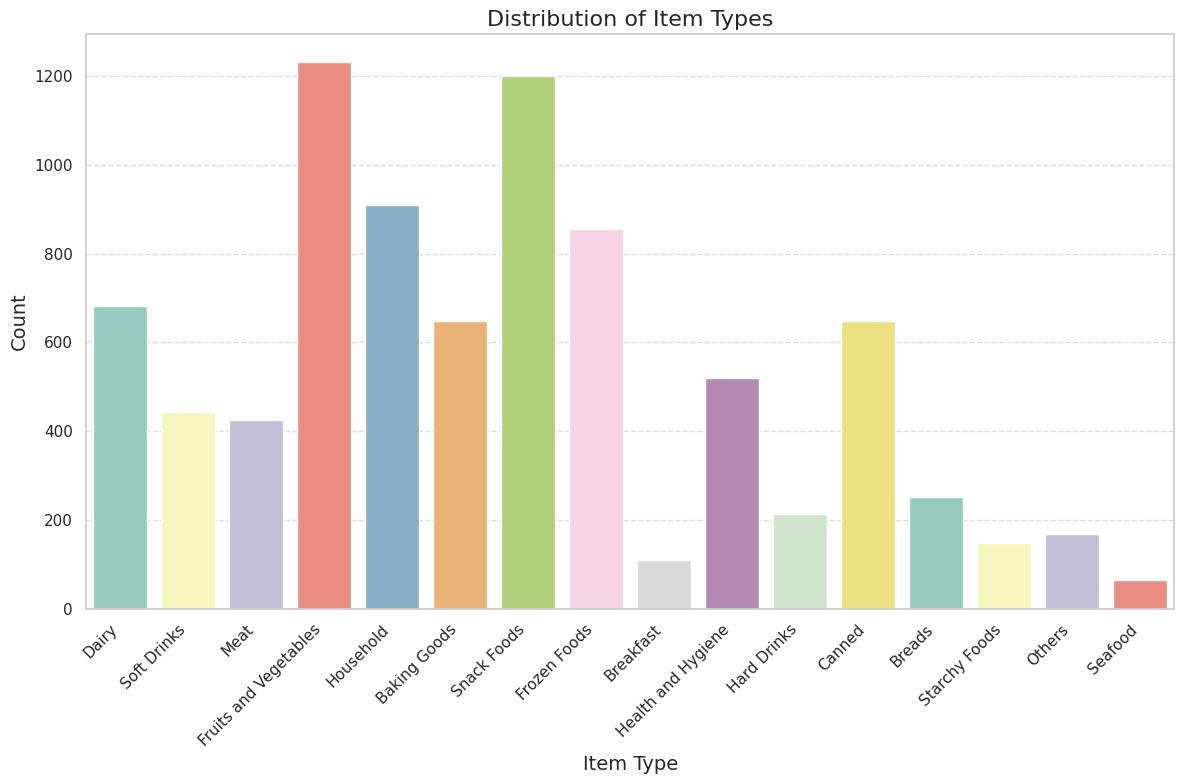

In [18]:
sns.set_style("whitegrid")  

plt.figure(figsize=(12, 8))

sns.countplot(
    data=data,
    x="Item_Type",
    palette="Set3", 
    hue_order=None,  
)

# Customize plot elements 
plt.xlabel("Item Type", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
plt.xticks(rotation=45, ha="right")  
plt.title("Distribution of Item Types", fontsize=16)  

# Add a grid
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.tight_layout()  
plt.show()

/tmp/ipykernel_29606/3653434864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


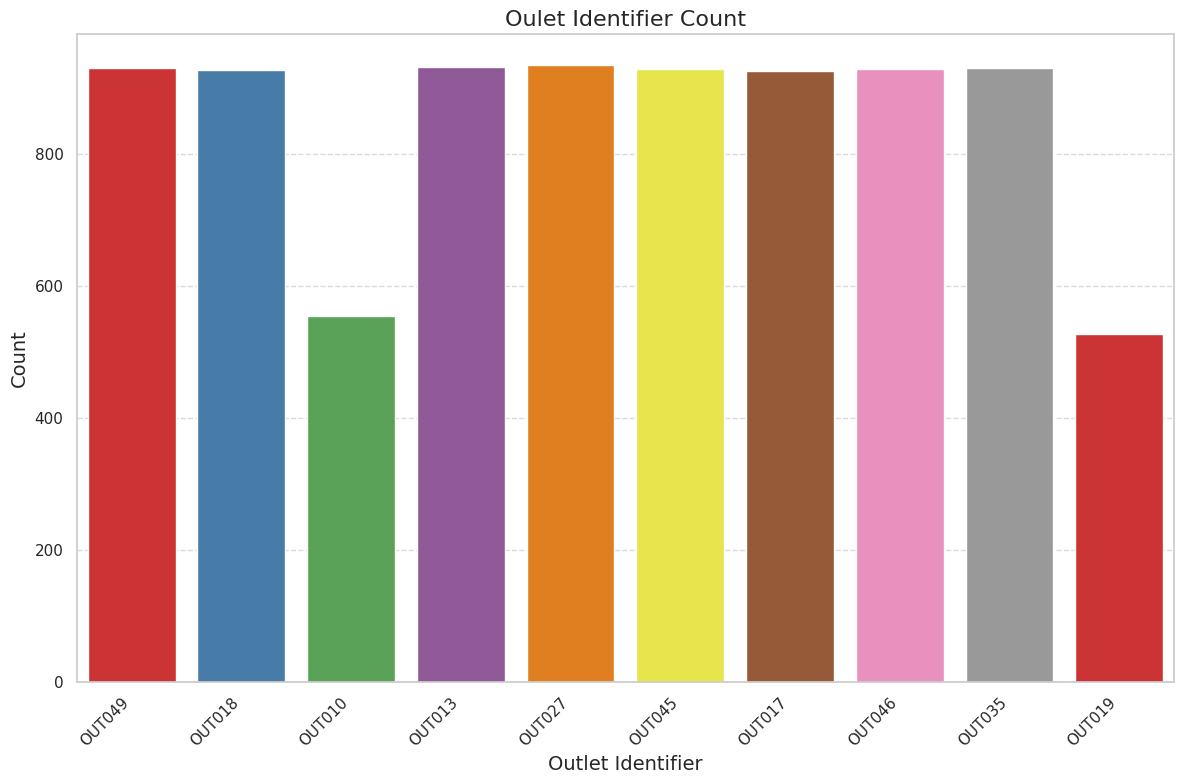

In [19]:
sns.set_style("whitegrid")  

plt.figure(figsize=(12, 8))

sns.countplot(
    data=data,
    x="Outlet_Identifier",
    palette="Set1", 
    hue_order=None,  
)

# Customize plot elements 
plt.xlabel("Outlet Identifier", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
plt.xticks(rotation=45, ha="right")  
plt.title("Oulet Identifier Count", fontsize=16)  

# Add a grid
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.tight_layout()  
plt.show()

/tmp/ipykernel_29606/821276369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


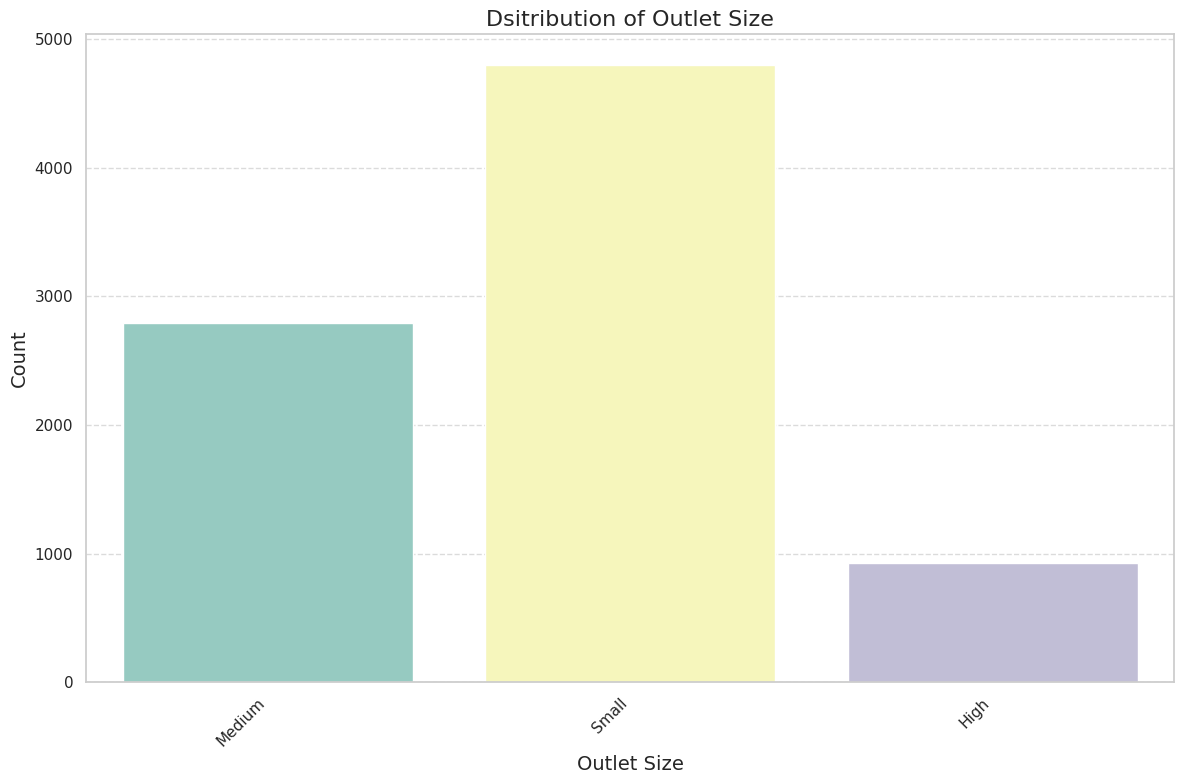

In [20]:
sns.set_style("whitegrid")  

plt.figure(figsize=(12, 8))

sns.countplot(
    data=data,
    x="Outlet_Size",
    palette="Set3", 
    hue_order=None,  
)

# Customize plot elements 
plt.xlabel("Outlet Size", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
plt.xticks(rotation=45, ha="right")  
plt.title("Dsitribution of Outlet Size", fontsize=16)  

# Add a grid
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.tight_layout()  
plt.show()

/tmp/ipykernel_29606/598088919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Outlet_Location_Type'],


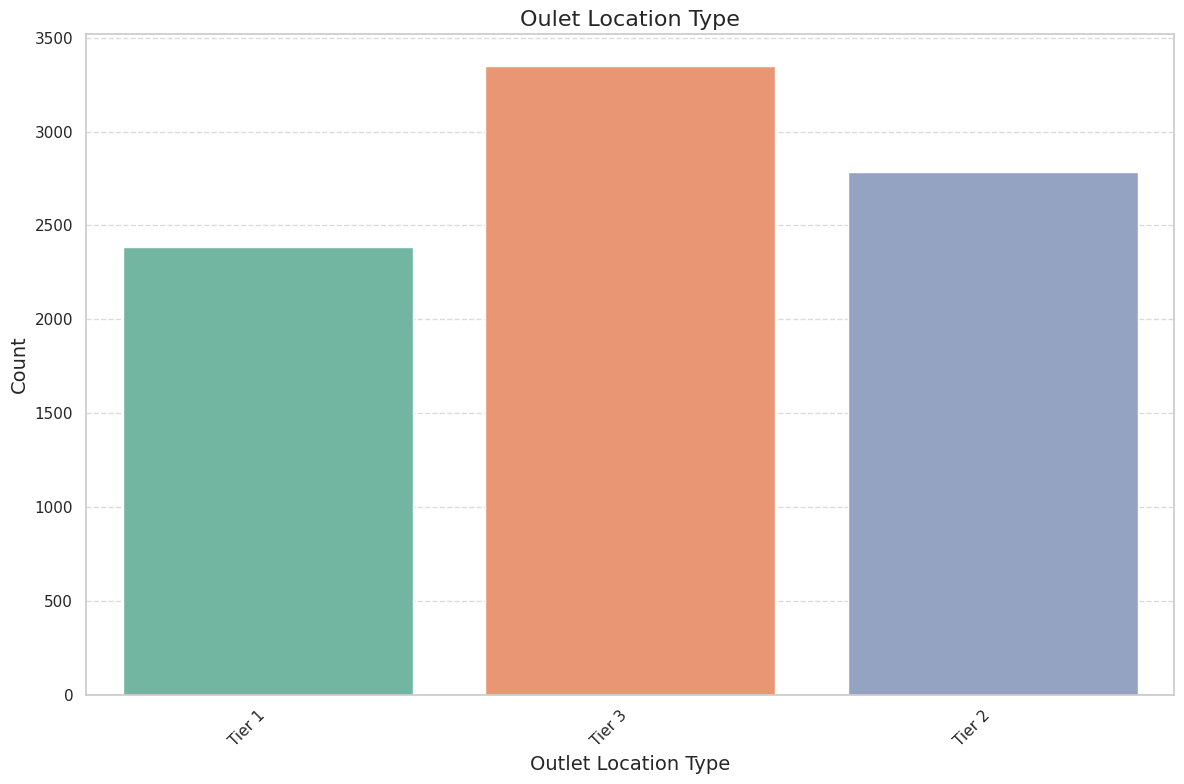

In [21]:
sns.set_style("whitegrid")  

plt.figure(figsize=(12, 8))

sns.countplot(x = data['Outlet_Location_Type'],
    palette="Set2", 
    hue_order=None,  
)

# Customize plot elements 
plt.xlabel("Outlet Location Type", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
plt.xticks(rotation=45, ha="right")  
plt.title("Oulet Location Type", fontsize=16)  

# Add a grid
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.tight_layout()  
plt.show()

/tmp/ipykernel_29606/1239804758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Outlet_Type'],


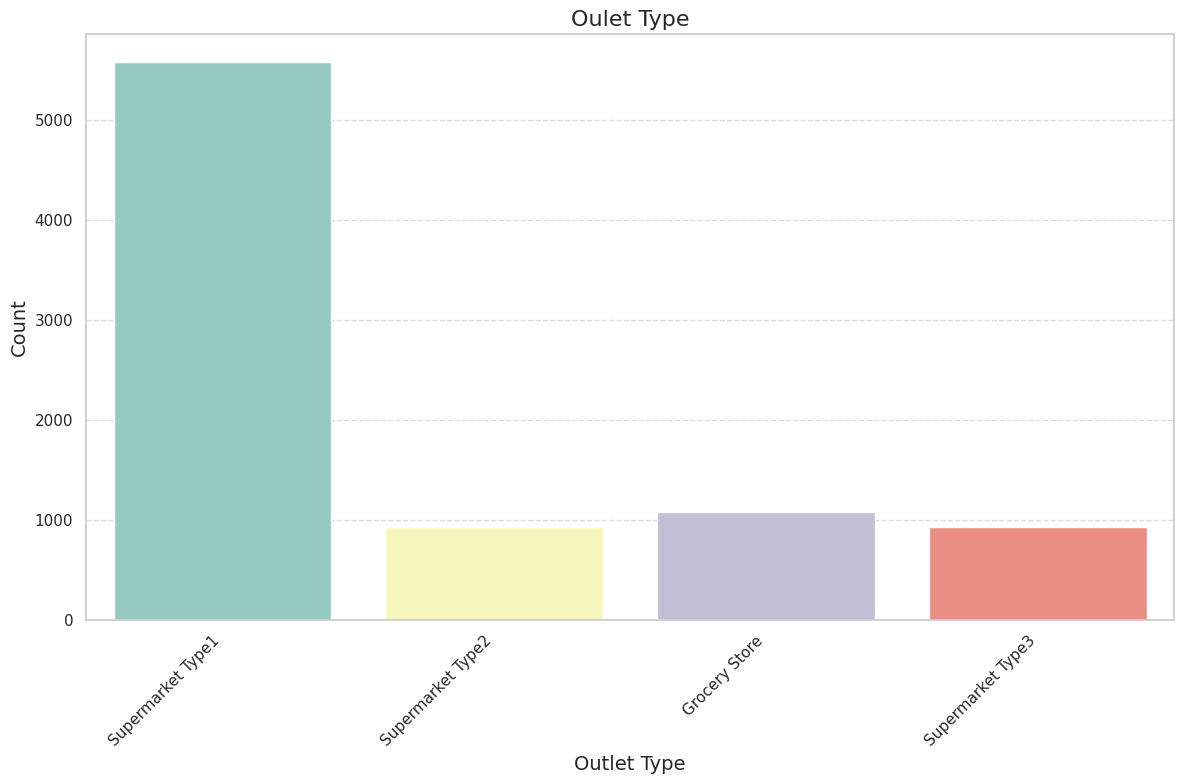

In [22]:
sns.set_style("whitegrid")  

plt.figure(figsize=(12, 8))

sns.countplot(x = data['Outlet_Type'],
    palette="Set3", 
    hue_order=None,  
)

# Customize plot elements 
plt.xlabel("Outlet Type", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
plt.xticks(rotation=45, ha="right")  
plt.title("Oulet Type", fontsize=16)  

# Add a grid
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.tight_layout()  
plt.show()

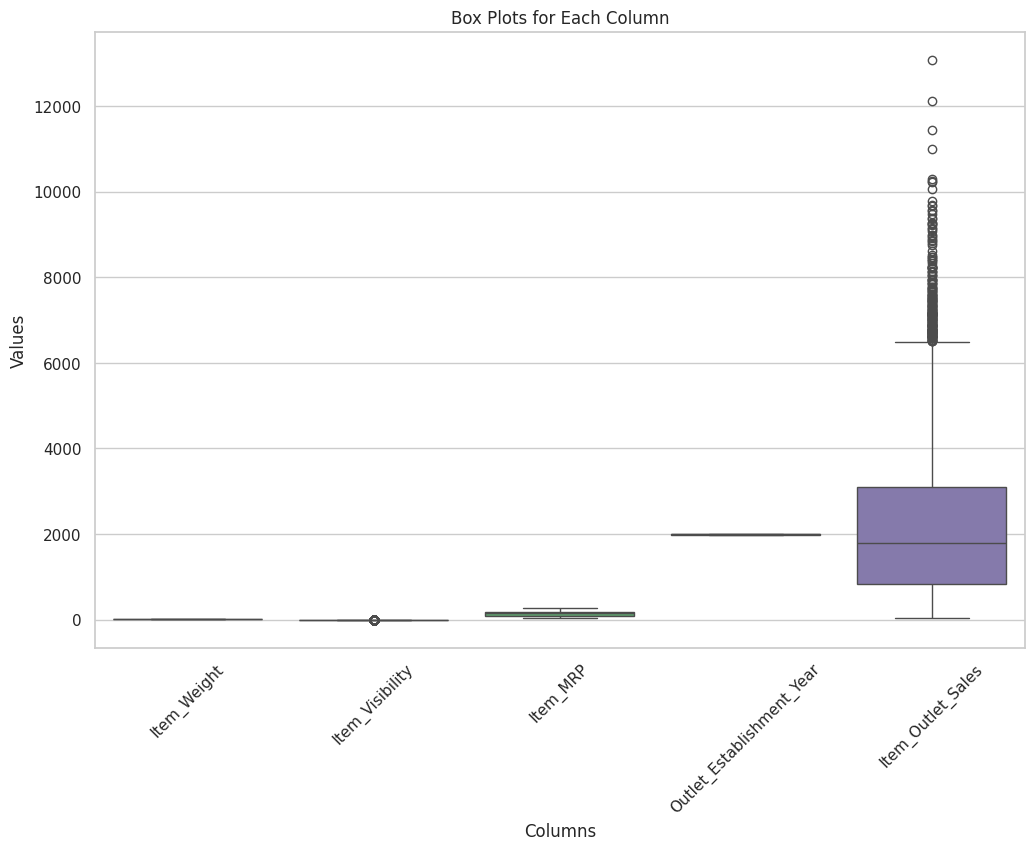

In [23]:
sns.set_style("whitegrid")  # Set a clean background style

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

sns.boxplot(data=data)

plt.title("Box Plots for Each Column")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [24]:
data['Item_Outlet_Sales']= np.log(data['Item_Outlet_Sales'])

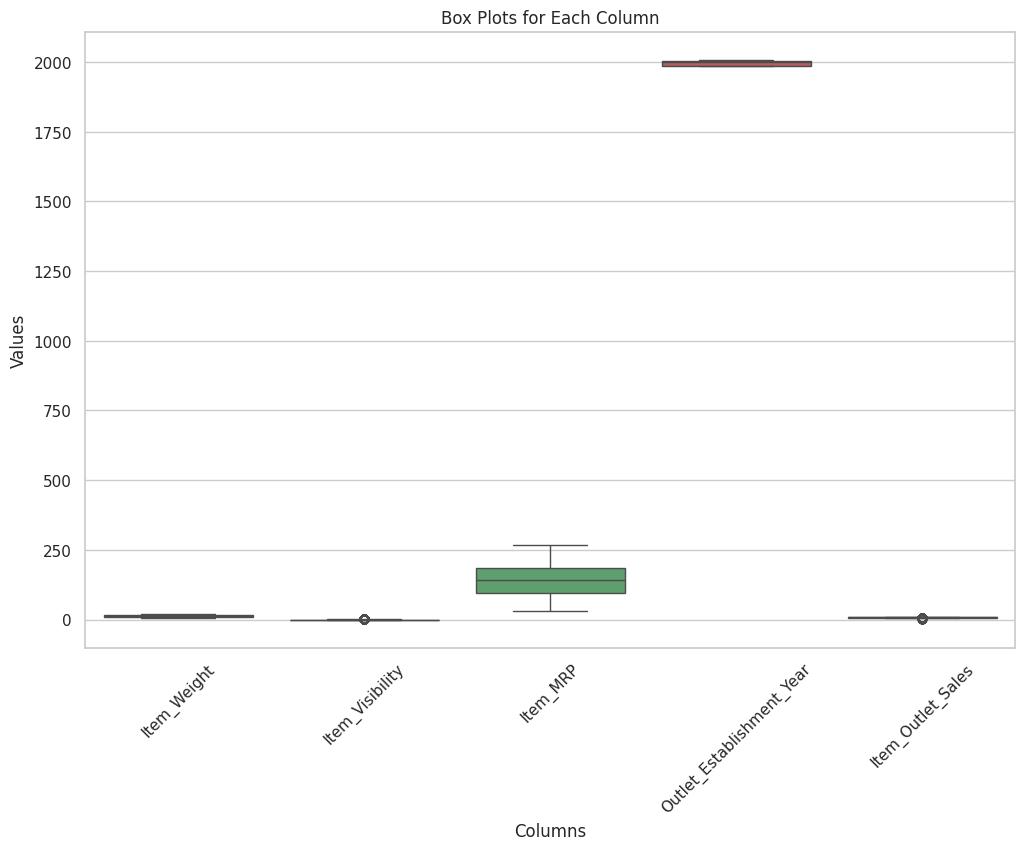

In [25]:
sns.set_style("whitegrid")  # Set a clean background style

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

sns.boxplot(data=data)

plt.title("Box Plots for Each Column")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


ENCODING


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Item_Identifier']  = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']  = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']  = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']  = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']  = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']  = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']  = encoder.fit_transform(data['Outlet_Type'])

In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,8.225540
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,6.094524
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,7.648392
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,6.596300
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,6.902446


In [28]:
data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,779.800516,12.813186,1.369397,0.066135,7.225886,141.000471,4.721896,1997.831964,1.453532,1.113002,1.201244,7.296617
std,449.179172,4.227434,0.644835,0.051600,4.209597,62.274675,2.837146,8.372247,0.683098,0.812716,0.796503,1.017143
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,3.505257
25%,396.000000,9.310000,1.000000,0.026988,4.000000,93.844250,2.000000,1987.000000,1.000000,0.000000,1.000000,6.727328
50%,783.500000,12.600000,1.000000,0.053935,6.000000,143.014100,5.000000,1999.000000,2.000000,1.000000,1.000000,7.492388
75%,1167.000000,16.000000,2.000000,0.094594,10.000000,185.652250,7.000000,2004.000000,2.000000,2.000000,1.000000,8.039575
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,9.479372


In [29]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

MODELLING

In [30]:
from sklearn.model_selection import train_test_split,  cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [31]:
#split data
X = data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
xgb_reg = XGBRegressor(random_state = 42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

In [42]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.6877213195681697

HYPER PARAMETER TUNING 

In [36]:
# Maximum depth of a tree
max_depth = list(np.arange(2, 35))

# Step size shrinkage used in update to prevents overfitting
learning_rate = list(np.arange(1, 100)/100)

# Number of gradient boosted trees
n_estimators = list(np.arange(100, 250))

# Subsample ratio of the training instances
subsample = list(np.arange(1, 10)/10)

# Subsample ratio of columns for each level
colsample_bylevel= list(np.arange(1, 10)/10)

# L1 regularization 
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'xgb_reg__max_depth': max_depth, 
    'xgb_reg__learning_rate': learning_rate,
    'xgb_reg__n_estimators': n_estimators,
    'xgb_reg__subsample': subsample,
    'xgb_reg__colsample_bylevel': colsample_bylevel,
    'xgb_reg__reg_alpha': reg_alpha
}

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
estimator_xgb = Pipeline([
    ('xgb_reg', xgb_reg)
])
crossval = KFold(n_splits=5, random_state=42, shuffle=True)

random_xgb = RandomizedSearchCV(
    estimator=estimator_xgb,
    param_distributions=hyperparam_space_xgb,  # Use param_distributions for RandomizedSearchCV
    n_iter=50,
    cv=crossval,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

In [46]:
random_xgb.fit(X_train, y_train) 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('xgb_reg',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_poli...
                                                               np.float64(0.1668100537200059),
                                                               np.float64(0.46415888336127775),
                                                               np.float64(1.2915496650148828),
                                                               np.float64(3.593813663804626),
                                                               np.float64(10.0)],
                                        'xgb_reg__subsample': [np.float64(0.1),
                                                               np.float64(0.2),
                                                               np.float64(0.3),
                                                               np.float64(0.4),
                                                               np.float64(0.5),
                                                               np.float64(0.6),
                                                               np.float64(0.7),
                                                               np.float64(0.8),
                                                               np.float64(0.9)]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [47]:
# Cek dan params terbaik
print('XGBoost')
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_params: {'xgb_reg__subsample': np.float64(0.9), 'xgb_reg__reg_alpha': np.float64(0.001), 'xgb_reg__n_estimators': np.int64(167), 'xgb_reg__max_depth': np.int64(3), 'xgb_reg__learning_rate': np.float64(0.03), 'xgb_reg__colsample_bylevel': np.float64(0.4)}


In [48]:
xgb_tuning = random_xgb.best_estimator_
# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics MSE, MAPE & R2 setelah tuning
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
mse_xgb_tuning = mean_squared_error(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
score_after_tuning_xgb = pd.DataFrame({'MAPE': mape_xgb_tuning, 'r2': r2_xgb_tuning,'MSE': mse_xgb_tuning, 'MAE': mae_xgb_tuning
},index=['xgb_reg'])
score_after_tuning_xgb

,MAPE,r2,MSE,MAE
xgb_reg,0.058316,0.741782,0.263544,0.400225


In [49]:
import pickle
pickle.dump(xgb_tuning, open('model.pkl', 'wb'))